# Pre-Processing FX Risk Premia Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

# 1. Carry Returns Data

In [2]:
# crs = pd.read_excel('FX Risk Premia Data.xlsx', 'CR', index_col=0, header=3).iloc[3:]
# crs.sort_index(inplace=True)
# crs = crs.astype(float)
# crs.columns = ['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']

# crs.head(2)

In [3]:
# rs = crs.apply(np.log).diff(1).fillna(0)
# rs.index = pd.to_datetime(rs.index)

# rs.head(2)

In [4]:
# rs.to_csv('g10_daily_carry_rs_2000_2019.csv')

# 2. Returns Data

<font color=red> Make sure that the timing lines up

In [5]:
prices = {}
files = glob.glob('G10 Minute Data 2019/*.csv')
for file in files:
    pair = (file.split('/')[-1]).replace('2019.csv', '')
    df = pd.read_csv(file, index_col=0, header=0)
    df = df[~df.index.duplicated()]
    df.index = pd.to_datetime(df.index)
    prices[pair] = df.copy()
    prices[pair].columns = ['O','H','L','C','V']
    del df

In [6]:
sel_period1 = '2019-10-01'
sel_period2 = '2019-10-09'

In [7]:
open_rs = pd.concat([prices[pair]['O'] for pair in prices.keys()], axis=1)
open_rs.columns = prices.keys()
open_rs = open_rs[['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']]
open_rs = open_rs[sel_period1:sel_period2]
# open_rs = open_rs.resample('1min').ffill()
open_rs = open_rs.apply(np.log).diff(1).fillna(0)
open_rs.to_csv(f'g10_minute_open_rs_{sel_period1}.csv')

print(open_rs.shape)
open_rs.head(2)

(10080, 9)


,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
0,,,,,,,,,
2019-10-01 00:00:00,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000
2019-10-01 00:01:00,-0.000101,-0.000114,-0.000046,-0.00003,-0.00008,0.000053,0.00004,0.000044,0.00009


In [8]:
low_rs = pd.concat([prices[pair]['L'] for pair in prices.keys()], axis=1)
low_rs.columns = prices.keys()
low_rs = low_rs[['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']]
low_rs = low_rs[sel_period1:sel_period2]
# low_rs = low_rs.resample('1min').ffill()
low_rs = low_rs.apply(np.log).diff(1).fillna(0)
low_rs.to_csv(f'g10_minute_low_rs_{sel_period1}.csv')

print(low_rs.shape)
low_rs.head(2)

(10080, 9)


,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
0,,,,,,,,,
2019-10-01 00:00:00,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2019-10-01 00:01:00,0.0,0.0,-0.000055,0.0,-0.000016,0.000045,0.00006,0.000031,0.000051


In [9]:
high_rs = pd.concat([prices[pair]['H'] for pair in prices.keys()], axis=1)
high_rs.columns = prices.keys()
high_rs = high_rs[['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']]
high_rs = high_rs[sel_period1:sel_period2]
# high_rs = high_rs.resample('1min').ffill()
high_rs = high_rs.apply(np.log).diff(1).fillna(0)
high_rs.to_csv(f'g10_minute_high_rs_{sel_period1}.csv')

print(high_rs.shape)
high_rs.head(2)

(10080, 9)


,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
0,,,,,,,,,
2019-10-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2019-10-01 00:01:00,-0.000037,-0.000033,-0.000129,0.000015,-0.000064,0.000023,0.00002,0.000048,-0.000007


In [10]:
last_rs = pd.concat([prices[pair]['C'] for pair in prices.keys()], axis=1)
last_rs.columns = prices.keys()
last_rs = last_rs[['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']]
last_rs = last_rs[sel_period1:sel_period2]
# last_rs = last_rs.resample('1min').ffill()
last_rs = last_rs.apply(np.log).diff(1).fillna(0)
last_rs.to_csv(f'g10_minute_last_rs_{sel_period1}.csv')

print(last_rs.shape)
last_rs.head(2)

(10080, 9)


,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
0,,,,,,,,,
2019-10-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
2019-10-01 00:01:00,0.000092,0.000081,-0.000028,0.000045,0.000032,0.0,-0.00002,-0.000066,-0.000048


In [11]:
# data_ohlc = pd.read_excel('FX Risk Premia Data.xlsx', 'OHLC', index_col=0, header=[3,5]).unstack()

In [12]:
# prices = data_ohlc.loc[:, 'PX_OPEN'].unstack().T
# prices.index = pd.to_datetime(prices.index)
# prices.sort_index(inplace=True)
# prices = prices.astype(float)
# prices.columns = ['AUDUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'USDNOK', 'NZDUSD', 'USDSEK']
# prices = prices[rs.columns]

# open_rs = prices.reindex(rs.index).apply(np.log).diff(1).fillna(0)

# open_rs.to_csv('g10_daily_open_rs_2000_2019.csv')

# open_rs.head(2)

In [13]:
# prices = data_ohlc.loc[:, 'PX_LOW'].unstack().T
# prices.index = pd.to_datetime(prices.index)
# prices.sort_index(inplace=True)
# prices = prices.astype(float)
# prices.columns = ['AUDUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'USDNOK', 'NZDUSD', 'USDSEK']
# prices = prices[rs.columns]

# low_rs = prices.reindex(rs.index).apply(np.log).diff(1).fillna(0)

# low_rs.to_csv('g10_daily_low_rs_2000_2019.csv')

# low_rs.head(2)

In [14]:
# prices = data_ohlc.loc[:, 'PX_HIGH'].unstack().T
# prices.index = pd.to_datetime(prices.index)
# prices.sort_index(inplace=True)
# prices = prices.astype(float)
# prices.columns = ['AUDUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'USDNOK', 'NZDUSD', 'USDSEK']
# prices = prices[rs.columns]

# high_rs = prices.reindex(rs.index).apply(np.log).diff(1).fillna(0)

# high_rs.to_csv('g10_daily_high_rs_2000_2019.csv')

# high_rs.head(2)

In [15]:
# prices = data_ohlc.loc[:, 'PX_LAST'].unstack().T
# prices.index = pd.to_datetime(prices.index)
# prices.sort_index(inplace=True)
# prices = prices.astype(float)
# prices.columns = ['AUDUSD', 'USDCAD', 'USDCHF', 'EURUSD', 'GBPUSD', 'USDJPY', 'USDNOK', 'NZDUSD', 'USDSEK']
# prices = prices[rs.columns]

# last_rs = prices.reindex(rs.index).apply(np.log).diff(1).fillna(0)

# last_rs.to_csv('g10_daily_last_rs_2000_2019.csv')

# last_rs.head(2)

# 3. Graph Data


<font color=red> Check if carry graph has been constructed properly

In [16]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import networkx as nx

In [17]:
forwards = pd.read_excel('FX Risk Premia Data.xlsx', '1MF', index_col=0, header=3).iloc[3:]
forwards.sort_index(inplace=True)
forwards = forwards.astype(float)
forwards.columns = ['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']

# Adjust implied forward points
forwards['USDJPY']*=100

forwards.head(2)

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
2000-01-03 00:00:00,23.85,2.55,-5140.0,2.95,3.15,-11.50,-61.4,-10.0,-180.5
2000-01-04 00:00:00,23.15,1.75,-5010.0,3.13,3.05,-11.13,-60.5,-28.5,-172.5


In [18]:
# carry_score = (forwards/prices).ffill()
# carry_score.plot(figsize=(15,3), legend=0, linewidth=2, grid=True)

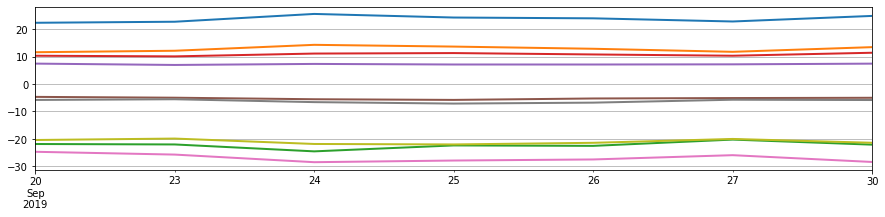

In [19]:
# Select the 10 days before 
sel_period1 = '2019-09-20'
sel_period2 = '2019-09-30'

prices_df = pd.concat([prices[pair]['C'] for pair in prices.keys()], axis=1)
prices_df.columns = prices.keys()
prices_df = prices_df[['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDNOK', 'USDSEK']]
prices_df = prices_df[sel_period1:sel_period2]
prices_df = prices_df.resample('1D').last().ffill()

carry_score = (forwards/prices_df).dropna()
carry_score.plot(figsize=(15,3), legend=0, linewidth=2, grid=True)

In [20]:
def pairwise_carry_score (cs1, cs2, scaling=10):
    return np.exp(np.mean(cs1-cs2)/scaling)

In [21]:
A = pd.DataFrame(data=pairwise_distances(carry_score.T, metric=pairwise_carry_score),
                 index=last_rs.columns,
                 columns=last_rs.columns)

A = A.replace(1,0)

A = A.T

# A[A<0.3] = 0

D_vals = A.sum(1)

A = pd.DataFrame(data=np.diag(1/D_vals**0.5).dot(A).dot(np.diag(1/D_vals**0.5)),
                 index=A.index,
                 columns=A.columns).replace([np.nan, np.inf], 0)

A.to_csv('g10_daily_carry_adjacency_matrix_2000_2019.csv')

A

,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,USDNOK,USDSEK
EURUSD,0.000000,0.158555,0.000749,0.114171,0.065622,0.009788,0.000369,0.008410,0.000902
GBPUSD,1.421533,0.000000,0.000989,0.150772,0.086659,0.012926,0.000487,0.011106,0.001192
USDJPY,7.490734,1.103352,0.000000,0.794491,0.456649,0.068114,0.002568,0.058521,0.006279
AUDUSD,1.546032,0.227724,0.001075,0.000000,0.094249,0.014058,0.000530,0.012078,0.001296
NZDUSD,1.801319,0.265326,0.001253,0.191054,0.000000,0.016379,0.000618,0.014073,0.001510
USDCAD,3.230400,0.475824,0.002247,0.342626,0.196931,0.000000,0.001108,0.025237,0.002708
USDCHF,9.469980,1.394887,0.006586,1.004416,0.577307,0.086111,0.000000,0.073984,0.007938
USDNOK,3.391716,0.499585,0.002359,0.359736,0.206765,0.030841,0.001163,0.000000,0.002843
USDSEK,7.041911,1.037243,0.004897,0.746887,0.429288,0.064032,0.002414,0.055015,0.000000


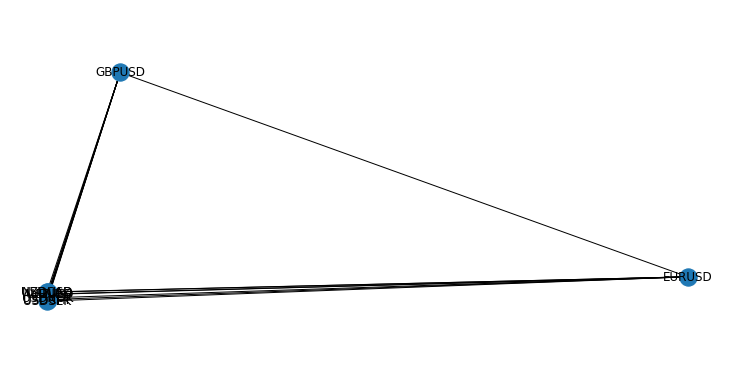

In [22]:
G = nx.from_pandas_adjacency(A)
plt.figure(figsize=(10,5))
nx.draw_kamada_kawai(G, with_labels=True)

In [23]:
# Adjacency matrix as a constant variable (N x N)
lbw = 30
damping_constant = 0.9
A_t = np.zeros((lbw, lbw))
for row_idx in range(A_t.shape[0]):
    for col_idx in range(A_t.shape[1]):
        if col_idx > row_idx:
            A_t[row_idx, col_idx] = damping_constant**(col_idx-row_idx)

A_t = A_t.T
A_t = pd.DataFrame(A_t)

A_t.to_csv('A_t_22.csv')

A_t.head(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.81,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
